In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import sys
sys.path.append('/home/yangyuxi/QuantResearch/HKUquantDataSdk/')

In [ ]:
from HKUquantDataSdk import HKUquantDataSdk
ds = HKUquantDataSdk(user='group1', password='PASSWORD')

In [3]:
mkt_open = '9:30:00'
mkt_close = '15:00:00'
lunch_begin = '11:30:00'
lunch_end = '13:00:00'
photovoltaic_tickers = [
    '601012.SH', '688223.SH', '002459.SZ', '600438.SH', '688472.SH'
]
semiconductor_tickers = [
    '688981.SH', '600584.SH', '688008.SH', '688126.SH', '688041.SH'
]
comm_service_tickers = [
    '000839.SZ', '600050.SH', '601728.SH', '300310.SZ', '002123.SZ'
]
comm_device_tickers = [
    '600105.SH', '002583.SZ', '000063.SZ', '600734.SH', '600522.SH'
]
ticker_sectors = {
    "Photovoltaic": photovoltaic_tickers,
    "Semiconductor": semiconductor_tickers,
    "CommService": comm_service_tickers,
    "CommDevice": comm_device_tickers,
}
tickers = [t for ts in ticker_sectors.values() for t in ts]
date_range = ('2022-01-01', '2024-06-01')

In [4]:
def get_data(start_date: str, end_date: str) -> pd.DataFrame:
    return ds.get_mins_history(
        tickers=tickers,
        fields=['Open', 'Close', 'Low', 'High', 'TurnoverRatio', 'ChangeRatio', 'AccChangeRatio', 'Volume', 'SellVolume', 'BuyVolume', 'Amount'],
        start_date=start_date.replace('-', ''),
        end_date=end_date.replace('-', ''),
        begin_time=mkt_open,
        end_time=mkt_close,
        price_mode='REAL',
        source='stock',
    )

In [5]:
def get_eod_data(start_date: str, end_date: str) -> pd.DataFrame:
    return ds.get_eod_history(
        tickers=tickers,
        fields=['Open', 'PreClose', 'Volume', 'Amount', 'ChangeRatio', 'UpAndDownStatus'],
        start_date=start_date.replace('-', ''),
        end_date=end_date.replace('-', ''),
        price_mode='AFTER',
        source='stock',
    )

In [6]:
raw_data: pd.DataFrame = get_data(*date_range)
raw_data

,ticker,TimeStamp,Open,Close,Low,High,TurnoverRatio,ChangeRatio,Volume,SellVolume,BuyVolume,Amount,AccChangeRatio
0,000063.SZ,2022-01-04 09:30:00,33.58,33.58,33.58,33.58,0.0023,0.2388,90100.0,32500.0,57600.0,3025558.0,0.238800
1,000063.SZ,2022-01-04 09:31:00,33.60,33.54,33.46,33.64,0.0215,-0.1191,836500.0,637800.0,238700.0,28083940.0,0.119416
2,000063.SZ,2022-01-04 09:32:00,33.49,33.43,33.40,33.51,0.0084,-0.3280,325800.0,161700.0,141100.0,10902558.0,-0.208976
3,000063.SZ,2022-01-04 09:33:00,33.45,33.37,33.35,33.45,0.0125,-0.1795,484900.0,364000.0,140300.0,16199437.0,-0.388101
4,000063.SZ,2022-01-04 09:34:00,33.40,33.43,33.36,33.43,0.0084,0.1798,327400.0,162700.0,134800.0,10925938.0,-0.208999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673890,688981.SH,2024-05-31 14:56:00,44.84,44.87,44.83,44.87,0.0081,0.0669,160506.0,85176.0,75330.0,7199000.0,-1.145659
2673891,688981.SH,2024-05-31 14:57:00,44.88,44.87,44.87,44.89,0.0093,0.0000,183208.0,99020.0,84188.0,8221200.0,-1.145659
2673892,688981.SH,2024-05-31 14:58:00,44.87,44.87,44.87,44.87,0.0000,0.0000,0.0,0.0,0.0,0.0,-1.145659
2673893,688981.SH,2024-05-31 14:59:00,44.87,44.87,44.87,44.87,0.0000,0.0000,0.0,0.0,0.0,0.0,-1.145659


In [7]:
raw_eod_data: dict[str, pd.DataFrame] = get_eod_data(*date_range)
raw_eod_data

{'Open': ticker       000063.SZ  000839.SZ   002123.SZ   002459.SZ  002583.SZ  \
 TradingDay                                                             
 20220104    535.899593  61.501738  126.287909  122.293824  30.979916   
 20220105    533.186582  61.727847  130.617361  120.898686  31.430533   
 20220106    521.855768  61.501738  128.782848  114.760078  30.698280   
 20220107    529.037270  64.667268  132.745397  117.776234  31.261552   
 20220110    537.814660  64.215050  126.948334  111.584478  30.698280   
 ...                ...        ...         ...         ...        ...   
 20240527    440.547191  57.205660   59.647525   38.803651  23.094119   
 20240528    445.296585  56.301223   58.248386   38.410637  23.206773   
 20240529    441.857369  54.492349   57.732913   40.768725  22.981465   
 20240530    438.254380  55.849005   57.438358   41.803546  22.699829   
 20240531    440.219647  57.657879   57.953830   42.074998  22.868811   
 
 ticker      300310.SZ  600050.SH  600105

In [8]:
eod_data = pd.DataFrame(
    [
        *[
            (
                ticker,
                dt.date(int(open_price[0][:4]), int(open_price[0][4:6]), int(open_price[0][6:])),
                (float(open_price_ticker) - float(pre_close_ticker)) / float(pre_close_ticker),
                change_ratio_ticker,
                up_and_down_statud_ticker,
                volume_ticker,
                amount_ticker,
            )
            for (
                open_price, pre_close,
                change_ratio, up_and_down_status,
                volume, amount
            )
            in zip(
                raw_eod_data['Open'].iterrows(), raw_eod_data['PreClose'].iterrows(),
                raw_eod_data['ChangeRatio'].iterrows(), raw_eod_data['UpAndDownStatus'].iterrows(),
                raw_eod_data['Volume'].iterrows(), raw_eod_data['Amount'].iterrows(),
            )
            for (
                (ticker, open_price_ticker), pre_close_ticker,
                change_ratio_ticker, up_and_down_statud_ticker,
                volume_ticker, amount_ticker,
            )
            in zip(
                open_price[1].items(), pre_close[1],
                change_ratio[1], up_and_down_status[1],
                volume[1], amount[1]
            )
        ]
    ],
    columns=[
        'ticker', 'TradingDay', 'Gap',
        'ChangeRatioEod', 'UpAndDownStatus',
        'VolumeEod', 'AmountEod',
    ],
).dropna()
eod_data

,ticker,TradingDay,Gap,ChangeRatioEod,UpAndDownStatus,VolumeEod,AmountEod
0,000063.SZ,2022-01-04,0.002388,-0.2388,0.0,290034.38,968728.059
1,000839.SZ,2022-01-04,0.014925,3.7313,0.0,1673614.22,458925.967
2,002123.SZ,2022-01-04,0.000581,2.3837,0.0,108828.20,189575.812
3,002459.SZ,2022-01-04,-0.007120,-2.2654,0.0,171997.98,1527930.126
4,002583.SZ,2022-01-04,-0.003623,1.2681,0.0,143783.00,80359.460
...,...,...,...,...,...,...,...
11635,688041.SH,2024-05-31,0.007049,2.5752,0.0,123476.12,870882.762
11636,688126.SH,2024-05-31,-0.003636,-1.6000,0.0,134177.34,182706.655
11637,688223.SH,2024-05-31,0.001248,1.7478,0.0,650584.31,524969.824
11638,688472.SH,2024-05-31,0.007937,0.8730,0.0,110623.78,140888.847


In [9]:
def shift_mins(df: pd.DataFrame, cols: list[str], offsets: list[int]) -> pd.DataFrame:
    for offset in offsets:
        new_df = df[['ticker', 'TimeStamp', *cols]]
        for col in cols:
            new_df[f'{col} {offset}min'] = new_df[col]
        new_df = new_df.drop(columns=cols)
        new_df['TimeStamp'] = new_df['TimeStamp'].dt.to_pydatetime() - dt.timedelta(minutes=offset)
        df = df.merge(new_df, on=('ticker', 'TimeStamp'))
    return df

In [10]:
data = raw_data.merge(eod_data, left_on=(raw_data['TimeStamp'].dt.date, 'ticker'), right_on=('TradingDay', 'ticker'))

data['Time'] = data['TimeStamp'].dt.time

data['DayOfWeek'] = data['TimeStamp'].dt.weekday

def find_sector(t: str) -> str:
    for s, ts in ticker_sectors.items():
        if t in ts:
            return s
    raise
data['Sector'] = data['ticker'].transform(find_sector)

data['AccChangeRatio'] = data['AccChangeRatio'] - data['Gap'] * 100

data = shift_mins(data, ['Open'], [-1])

index_cols = ['ticker', 'Sector', 'TimeStamp', 'TradingDay', 'DayOfWeek', 'Time']
min_cols = ['Open', 'Open -1min', 'Close', 'Low', 'High', 'TurnoverRatio', 'ChangeRatio', 'Volume', 'SellVolume', 'BuyVolume', 'Amount', 'AccChangeRatio']
eod_cols = ['Gap', 'ChangeRatioEod', 'UpAndDownStatus', 'VolumeEod', 'AmountEod']
all_cols = index_cols + min_cols + eod_cols

data = data[all_cols]

data

/tmp/ipykernel_3717440/2428369404.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[f'{col} {offset}min'] = new_df[col]
/tmp/ipykernel_3717440/2428369404.py:7: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  new_df['TimeStamp'] = new_df['TimeStamp'].dt.to_pydatetime() - dt.timedelta(minutes=offset)


,ticker,Sector,TimeStamp,TradingDay,DayOfWeek,Time,Open,Open -1min,Close,Low,...,Volume,SellVolume,BuyVolume,Amount,AccChangeRatio,Gap,ChangeRatioEod,UpAndDownStatus,VolumeEod,AmountEod
0,000063.SZ,CommDevice,2022-01-04 09:31:00,2022-01-04,1,09:31:00,33.60,33.58,33.54,33.46,...,836500.0,637800.0,238700.0,28083940.0,-0.119390,0.002388,-0.2388,0.0,290034.38,968728.059
1,000063.SZ,CommDevice,2022-01-04 09:32:00,2022-01-04,1,09:32:00,33.49,33.60,33.43,33.40,...,325800.0,161700.0,141100.0,10902558.0,-0.447782,0.002388,-0.2388,0.0,290034.38,968728.059
2,000063.SZ,CommDevice,2022-01-04 09:33:00,2022-01-04,1,09:33:00,33.45,33.49,33.37,33.35,...,484900.0,364000.0,140300.0,16199437.0,-0.626907,0.002388,-0.2388,0.0,290034.38,968728.059
3,000063.SZ,CommDevice,2022-01-04 09:34:00,2022-01-04,1,09:34:00,33.40,33.45,33.43,33.36,...,327400.0,162700.0,134800.0,10925938.0,-0.447805,0.002388,-0.2388,0.0,290034.38,968728.059
4,000063.SZ,CommDevice,2022-01-04 09:35:00,2022-01-04,1,09:35:00,33.43,33.40,33.43,33.40,...,207200.0,115600.0,91800.0,6923359.0,-0.447805,0.002388,-0.2388,0.0,290034.38,968728.059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651700,688981.SH,Semiconductor,2024-05-31 14:56:00,2024-05-31,4,14:56:00,44.84,44.81,44.87,44.83,...,160506.0,85176.0,75330.0,7199000.0,-0.506752,-0.006389,-1.1897,0.0,314630.49,1414729.533
2651701,688981.SH,Semiconductor,2024-05-31 14:57:00,2024-05-31,4,14:57:00,44.88,44.84,44.87,44.87,...,183208.0,99020.0,84188.0,8221200.0,-0.506752,-0.006389,-1.1897,0.0,314630.49,1414729.533
2651702,688981.SH,Semiconductor,2024-05-31 14:58:00,2024-05-31,4,14:58:00,44.87,44.88,44.87,44.87,...,0.0,0.0,0.0,0.0,-0.506752,-0.006389,-1.1897,0.0,314630.49,1414729.533
2651703,688981.SH,Semiconductor,2024-05-31 14:59:00,2024-05-31,4,14:59:00,44.87,44.87,44.87,44.87,...,0.0,0.0,0.0,0.0,-0.506752,-0.006389,-1.1897,0.0,314630.49,1414729.533


In [11]:
def get_stats(model: LinearRegression, X, y) -> pd.DataFrame:
    lm = model
    lm.fit(X,y)
    params = np.append(lm.intercept_,lm.coef_)
    predictions = lm.predict(X)

    # newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
    # MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

    # Note if you don't want to use a DataFrame replace the two lines above with
    newX = np.append(np.ones((len(X),1)), X, axis=1)
    MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params / sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

    df = pd.DataFrame()
    df["Coeff"],df["StdErr"],df["T"],df["P"] = [params,sd_b,ts_b,p_values]

    return df

In [12]:
def draw_line(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = x_vals * slope + intercept
    plt.plot(x_vals, y_vals, color='black')

<Axes: xlabel='Quadrant'>

<Figure size 1200x800 with 0 Axes>

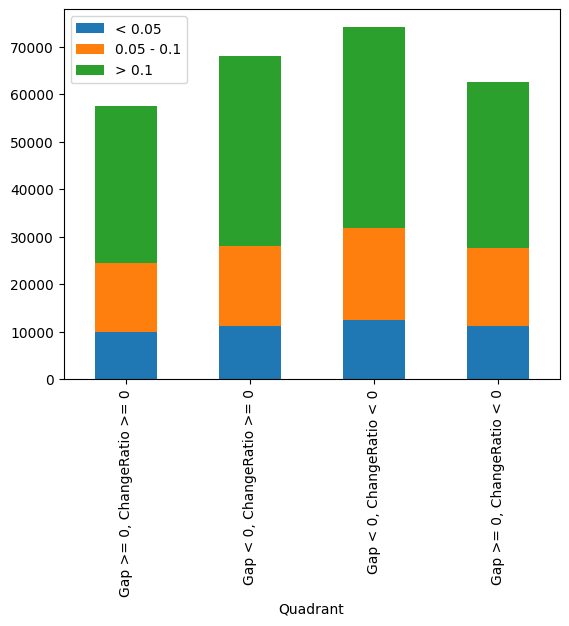

In [27]:
d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'ChangeRatio']]

d = d[(d['Sector'] == 'Photovoltaic')]

dq = d[(d['Time'] < dt.time(12, 0))]

x = dq['Gap'].to_frame()
y = dq['ChangeRatio']

plt.figure(figsize=(12, 8))

dqq = [
    [
        'Gap >= 0, ChangeRatio >= 0',
        len(dq[(dq['Gap'] >= 0) & (dq['ChangeRatio'] >= 0) & (dq['ChangeRatio'].abs() < 0.05) & (dq['ChangeRatio'].abs() > 0.0)]),
        len(dq[(dq['Gap'] >= 0) & (dq['ChangeRatio'] >= 0) & (dq['ChangeRatio'].abs() < 0.1) & (dq['ChangeRatio'].abs() >= 0.05)]),
        len(dq[(dq['Gap'] >= 0) & (dq['ChangeRatio'] >= 0) & (dq['ChangeRatio'].abs() >= 0.1)]),
    ],
    [
        'Gap < 0, ChangeRatio >= 0',
        len(dq[(dq['Gap'] < 0)  & (dq['ChangeRatio'] >= 0) & (dq['ChangeRatio'].abs() < 0.05) & (dq['ChangeRatio'].abs() > 0.0)]),
        len(dq[(dq['Gap'] < 0)  & (dq['ChangeRatio'] >= 0) & (dq['ChangeRatio'].abs() < 0.1) & (dq['ChangeRatio'].abs() >= 0.05)]),
        len(dq[(dq['Gap'] < 0)  & (dq['ChangeRatio'] >= 0) & (dq['ChangeRatio'].abs() >= 0.1)]),
    ],
    [
        'Gap < 0, ChangeRatio < 0',
        len(dq[(dq['Gap'] < 0)  & (dq['ChangeRatio'] < 0)  & (dq['ChangeRatio'].abs() < 0.05) & (dq['ChangeRatio'].abs() > 0.0)]),
        len(dq[(dq['Gap'] < 0)  & (dq['ChangeRatio'] < 0)  & (dq['ChangeRatio'].abs() < 0.1) & (dq['ChangeRatio'].abs() >= 0.05)]),
        len(dq[(dq['Gap'] < 0)  & (dq['ChangeRatio'] < 0)  & (dq['ChangeRatio'].abs() >= 0.1)]),
    ],
    [
        'Gap >= 0, ChangeRatio < 0',
        len(dq[(dq['Gap'] >= 0) & (dq['ChangeRatio'] < 0)  & (dq['ChangeRatio'].abs() < 0.05) & (dq['ChangeRatio'].abs() > 0.0)]),
        len(dq[(dq['Gap'] >= 0) & (dq['ChangeRatio'] < 0)  & (dq['ChangeRatio'].abs() < 0.1) & (dq['ChangeRatio'].abs() >= 0.05)]),
        len(dq[(dq['Gap'] >= 0) & (dq['ChangeRatio'] < 0)  & (dq['ChangeRatio'].abs() >= 0.1)]),
    ],
]
dqq = pd.DataFrame(dqq, columns=['Quadrant', '< 0.05', '0.05 - 0.1', '> 0.1'])
dqq.plot.bar(x='Quadrant', stacked=True)

# plt.show()

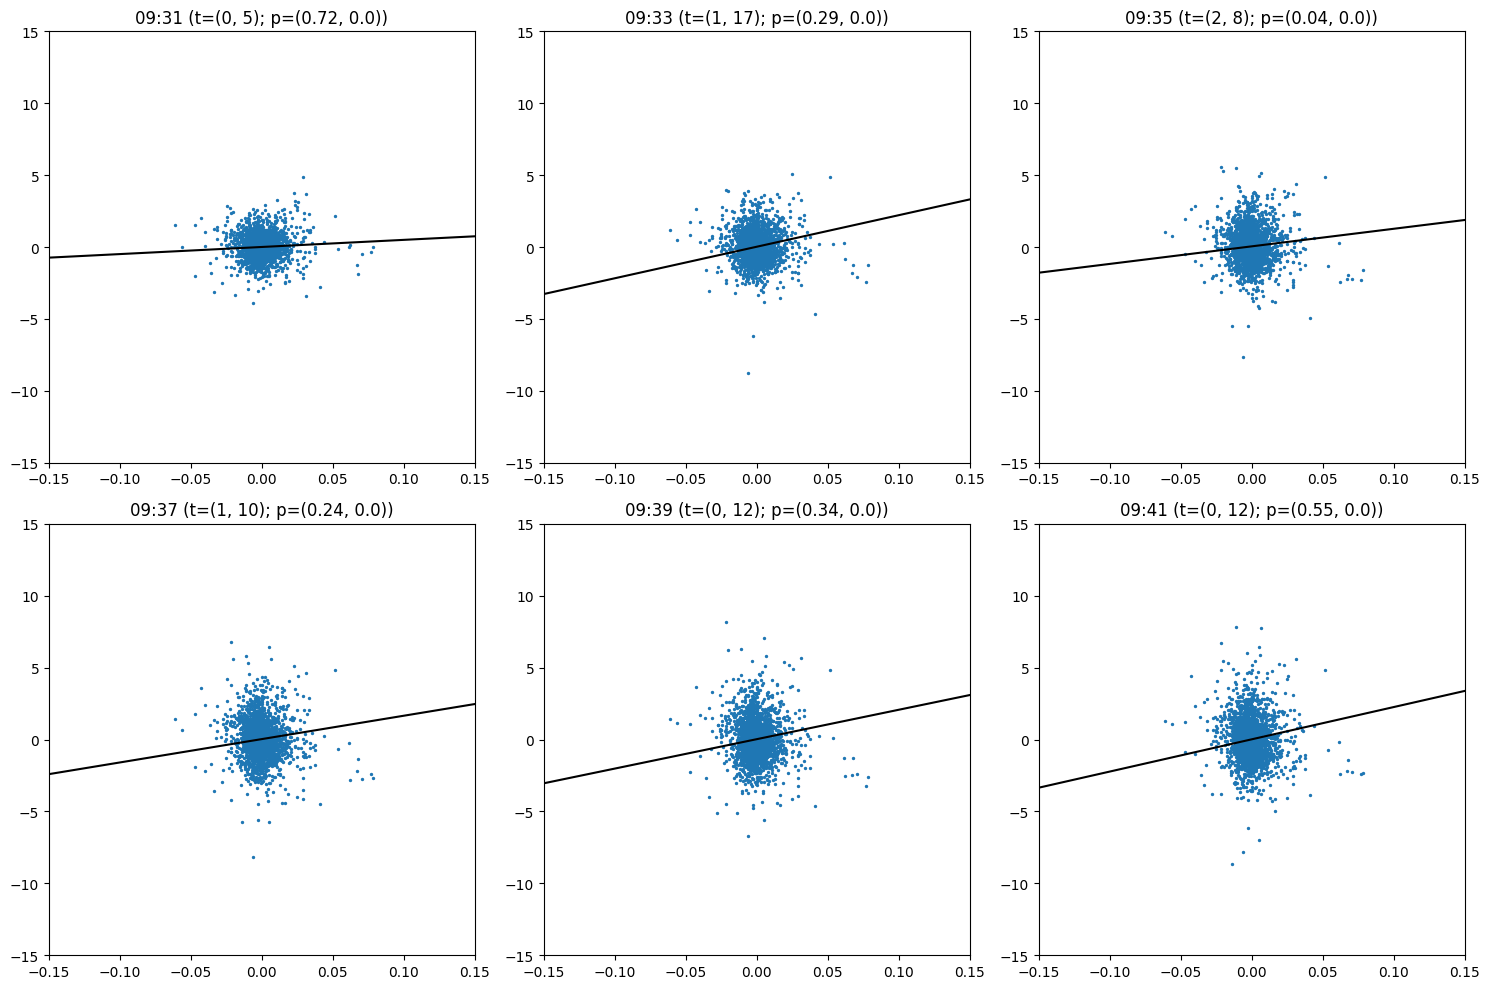

In [41]:
d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'AccChangeRatio']]

d = d[(d['Sector'] == 'Photovoltaic')]

plt.figure(figsize=(15, 10))

for i in range(6):
    time = (
        dt.datetime.combine(dt.date.today(), dt.time(9, 30))
        + dt.timedelta(minutes = i * 2 + 1)
    ).time()

    dq = d[(d['Time'] == time)]

    x = dq['Gap'].to_frame()
    y = dq['AccChangeRatio']

    model = LinearRegression()
    model.fit(x, y)
    model_stats = get_stats(model, x.to_numpy(), y.to_numpy())

    plt.subplot(2, 3, i + 1)

    title_time = time.strftime('%H:%M')
    title_t = ', '.join(model_stats['T'].astype(int).astype(str))
    title_p = ', '.join(model_stats['P'].round(2).astype(str))
    plt.title(f'{title_time} (t=({title_t}); p=({title_p}))')

    plt.ylim(-15, 15)
    plt.xlim(-0.15, 0.15)

    # For different sectors visualization
    # for s, dqq in dq.groupby('Sector'):
    #     plt.scatter(
    #         dqq['Gap'],
    #         dqq['AccChangeRatio'],
    #         s=2,
    #         label=f'{s} (n={len(dqq)})'
    #     )
    # plt.legend()

    plt.scatter(
        x,
        y,
        s=2,
    )

    draw_line(model.coef_, model.intercept_)

plt.tight_layout()
plt.show()

In [47]:
from typing import Generator, Optional, Callable

pd.options.mode.chained_assignment = None

def backtest(
    df: pd.DataFrame,
    action: Callable[[float], float],
    time: Optional[dt.time] = None,
) -> Generator[tuple[str, float, float, float], None, None]:
    if time is not None:
        df = df[(df['Time'] == time)]
    
    # -1 - short, 1 - long
    df['Action'] = df['Gap'].transform(action)
    df['Return'] = df['AccChangeRatio'] * df['Action']

    acc_strat = 0
    acc = 0
    ex_acc = 0
    for day, d in df.groupby('TradingDay'):
        acc_strat += d['Return'].sum()
        acc += d['AccChangeRatio'].sum()
        ex_acc += d['Return'].sum() - d['AccChangeRatio'].sum()
        yield (day, acc_strat, acc, ex_acc)

In [48]:
def strat1(x: float) -> float:
    if x > 0:
        return -1
    else:
        return 1

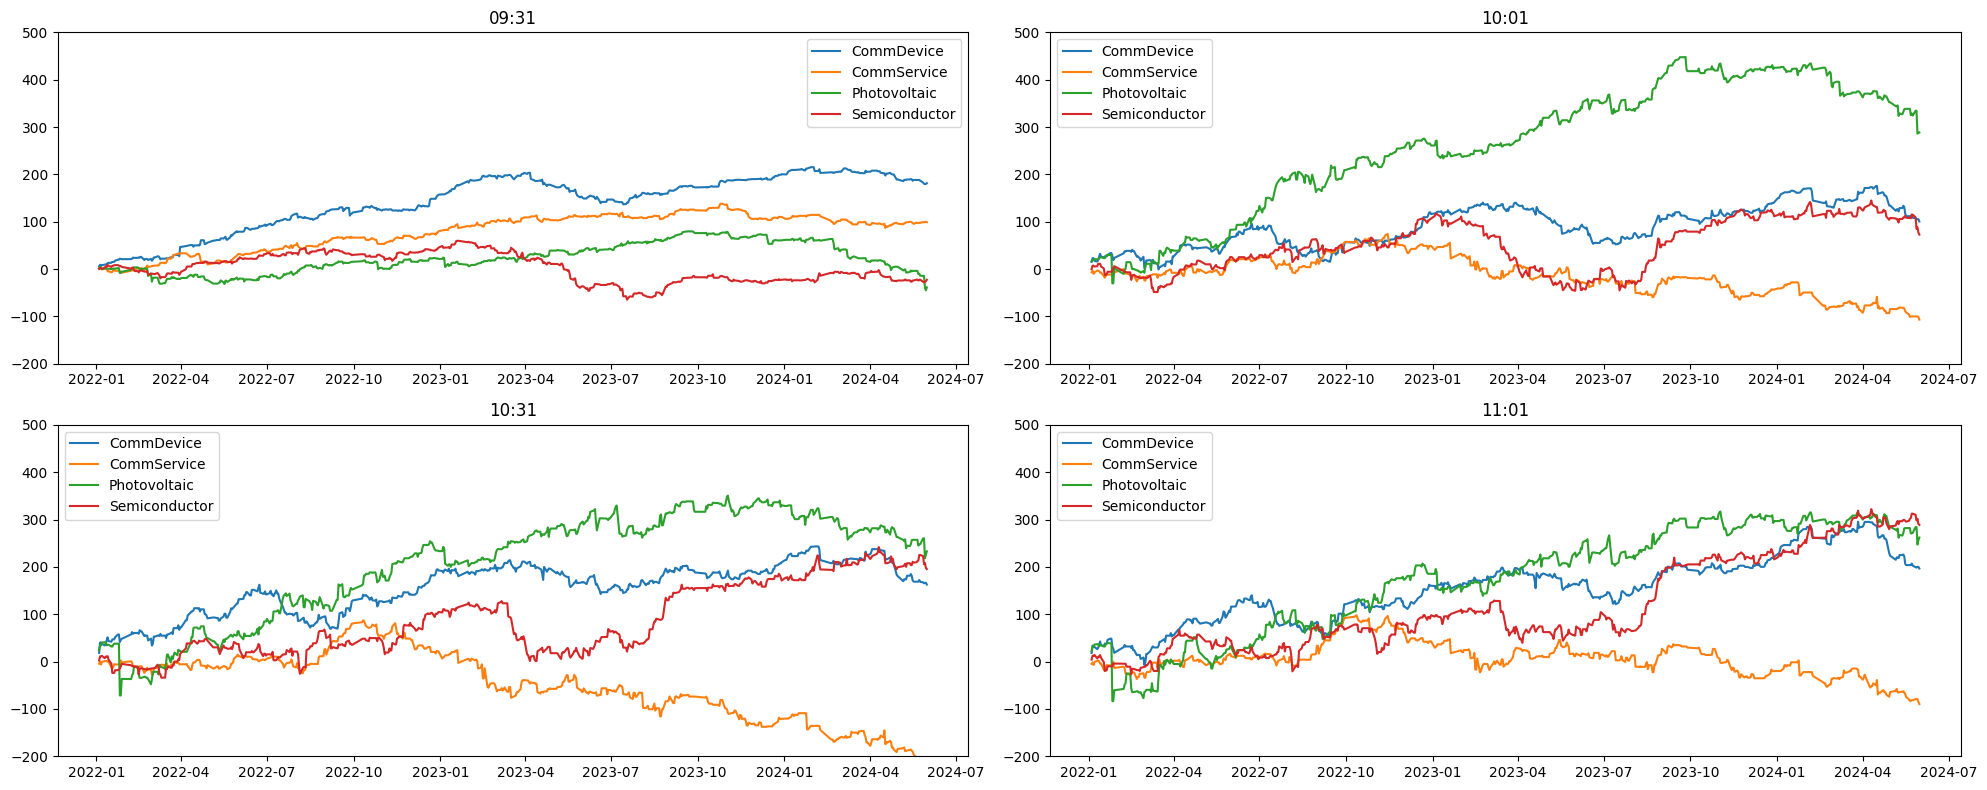

In [53]:
d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'AccChangeRatio']]

plt.figure(figsize=(20, 8))

for i in range(4):
    time = (
        dt.datetime.combine(dt.date.today(), dt.time(9, 30))
        + dt.timedelta(minutes = i * 30 + 1)
    ).time()

    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    plt.subplot(2, 2, i + 1)

    time_label = time.strftime('%H:%M')
    plt.title(time_label)

    plt.ylim(-200, 500)
    
    for i, (s, dd) in enumerate(d.groupby('Sector')):
        results = list(backtest(dd, strat1, time = time))

        days = np.fromiter((day for day, _, _, _ in results), dtype=dt.date)
        returns_strat = np.fromiter((acc for _, acc, _, _ in results), dtype=np.float32)
        returns = np.fromiter((acc for _, _, acc, _ in results), dtype=np.float32)
        excess_returns = np.fromiter((acc for _, _, _, acc in results), dtype=np.float32)

        color = colors[i]

        plt.plot(
            days,
            excess_returns,
            linestyle='-',
            color=color,
            label=f'{s}',
        )

    plt.legend()

plt.tight_layout()
plt.show()

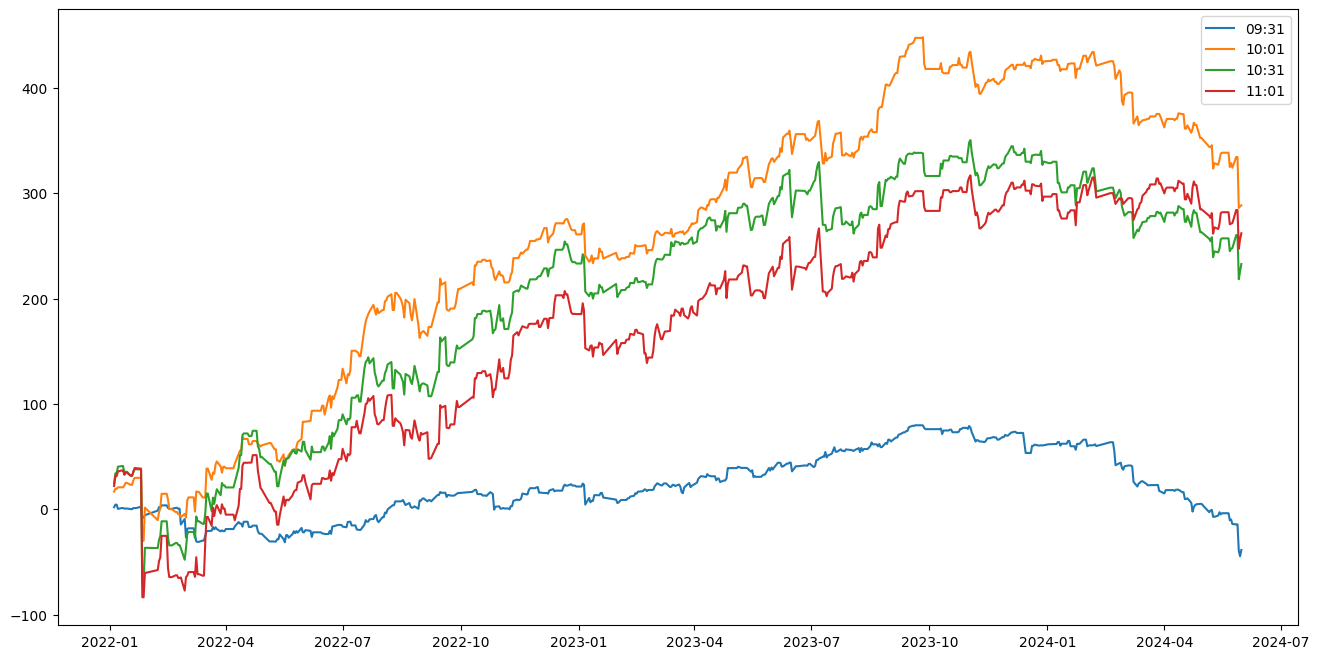

In [52]:
d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'AccChangeRatio']]

d = d[(d['Sector'] == 'Photovoltaic')]

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(16, 8))

for i in range(4):
    time = (
        dt.datetime.combine(dt.date.today(), dt.time(9, 30))
        + dt.timedelta(minutes = i * 30 + 1)
    ).time()

    time_label = time.strftime('%H:%M')
    
    results = list(backtest(d, strat1, time = time))

    days = np.fromiter((day for day, _, _, _ in results), dtype=dt.date)
    returns_strat = np.fromiter((acc for _, acc, _, _ in results), dtype=np.float32)
    returns = np.fromiter((acc for _, _, acc, _ in results), dtype=np.float32)
    excess_returns = np.fromiter((acc for _, _, _, acc in results), dtype=np.float32)

    color = colors[i]

    plt.plot(
        days,
        excess_returns,
        linestyle='-',
        color=color,
        label=f'{time_label}',
    )

plt.legend()
plt.show()